# Exploratory Data Analysis (EDA) on Phishing Website Detection Dataset

## Feature Description Summary

This dataset contains 30 engineered features extracted from 11,055 website URLs for 
phishing detection, categorized into three main groups:

### URL-Based Features (12 features)
Features extracted directly from the website address including IP usage, URL length, 
special characters, SSL status, domain characteristics, and redirection patterns. 
These are obtained through URL parsing and string analysis without requiring webpage access.

### HTML/Content-Based Features (11 features)
Features extracted from webpage source code including hyperlink analysis, form handlers, 
JavaScript behaviors, iframe presence, and resource loading patterns. These require 
downloading and parsing the HTML content of the webpage.

### Domain/Third-Party Features (7 features)
Features obtained from external services including domain age, DNS records, web traffic 
rankings, Google indexing status, backlinks, and blacklist presence. These require 
querying WHOIS databases, DNS servers, and search engines.

### Target Variable
**Result:** Binary classification where 1 represents legitimate websites and -1 represents 
phishing websites, creating a balanced dataset for supervised learning.

### Feature Engineering
All features are numerically encoded using values {-1, 0, 1} representing absence, 
neutral/suspicious, and presence of phishing indicators respectively. This standardized 
encoding enables efficient machine learning model training without additional preprocessing.


## Import Libraries and Load Data

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Load the dataset
df = pd.read_csv('/Users/aryankhurana/Desktop/Network Security/Network_Security/Network_data/phisingData.csv')
print("Dataset loaded successfully!")

Dataset loaded successfully!


## Dataset Overview

In [3]:
# Display basic information
print("=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)
print(f"\nDataset Shape: {df.shape}")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
print(f"\nMemory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n" + "-" * 80)
print("\nFirst 5 Rows:")
print(df.head())
print("\n" + "-" * 80)
print("\nLast 5 Rows:")
print(df.tail())


DATASET OVERVIEW

Dataset Shape: (11055, 31)
Number of Rows: 11055
Number of Columns: 31

Memory Usage: 2.61 MB

--------------------------------------------------------------------------------

First 5 Rows:
   having_IP_Address  URL_Length  Shortining_Service  having_At_Symbol  \
0                 -1           1                   1                 1   
1                  1           1                   1                 1   
2                  1           0                   1                 1   
3                  1           0                   1                 1   
4                  1           0                  -1                 1   

   double_slash_redirecting  Prefix_Suffix  having_Sub_Domain  SSLfinal_State  \
0                        -1             -1                 -1              -1   
1                         1             -1                  0               1   
2                         1             -1                 -1              -1   
3                     

Conclusion: The dataset contains 11,055 samples with 31 features including 30 predictors and 1 target variable named 'Result'.

## Data Types and Column Information

In [4]:
# Check data types and info
print("=" * 80)
print("DATA TYPES AND COLUMN INFORMATION")
print("=" * 80)
df.info()
print("\n" + "-" * 80)
print("\nColumn Names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")


DATA TYPES AND COLUMN INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Ancho

Conclusion: All 31 features are of integer data type with no object or float columns, indicating all features are categorical/ordinal encoded

## Missing Values Analysis

In [5]:
# Check for missing values
print("=" * 80)
print("MISSING VALUES ANALYSIS")
print("=" * 80)
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) == 0:
    print("\n✓ No missing values found in the dataset!")
else:
    print("\nMissing Values Summary:")
    print(missing_df.to_string(index=False))
    
print(f"\nTotal Missing Values: {df.isnull().sum().sum()}")
print(f"Percentage of Complete Cases: {(len(df) - df.isnull().any(axis=1).sum()) / len(df) * 100:.2f}%")


MISSING VALUES ANALYSIS

✓ No missing values found in the dataset!

Total Missing Values: 0
Percentage of Complete Cases: 100.00%


Conclusion: The dataset is complete with no missing values across all 11,055 records and 31 features

## Duplicate Records Check

In [6]:
# Check for duplicate rows
print("=" * 80)
print("DUPLICATE RECORDS ANALYSIS")
print("=" * 80)
duplicate_count = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicate_count}")
print(f"Percentage of Duplicates: {(duplicate_count / len(df)) * 100:.2f}%")

if duplicate_count > 0:
    print("\nSample Duplicate Rows:")
    print(df[df.duplicated(keep=False)].head(10))
else:
    print("\n✓ No duplicate records found!")


DUPLICATE RECORDS ANALYSIS

Number of Duplicate Rows: 5206
Percentage of Duplicates: 47.09%

Sample Duplicate Rows:
   having_IP_Address  URL_Length  Shortining_Service  having_At_Symbol  \
0                 -1           1                   1                 1   
1                  1           1                   1                 1   
2                  1           0                   1                 1   
3                  1           0                   1                 1   
4                  1           0                  -1                 1   
5                 -1           0                  -1                 1   
6                  1           0                  -1                 1   
7                  1           0                   1                 1   
8                  1           0                  -1                 1   
9                  1           1                  -1                 1   

   double_slash_redirecting  Prefix_Suffix  having_Sub_Domain  SSLfin

## Target Variable Analysis


TARGET VARIABLE ANALYSIS

Target Variable: 'Result'
--------------------------------------------------------------------------------

Value Counts:
Result
-1    4898
 1    6157
Name: count, dtype: int64

Percentage Distribution:
Result
-1    44.305744
 1    55.694256
Name: proportion, dtype: float64

--------------------------------------------------------------------------------
Class Balance Analysis:
Class 1 (Legitimate):   6157 samples (55.69%)
Class -1 (Phishing):    4898 samples (44.31%)
Imbalance Ratio:       1.26:1


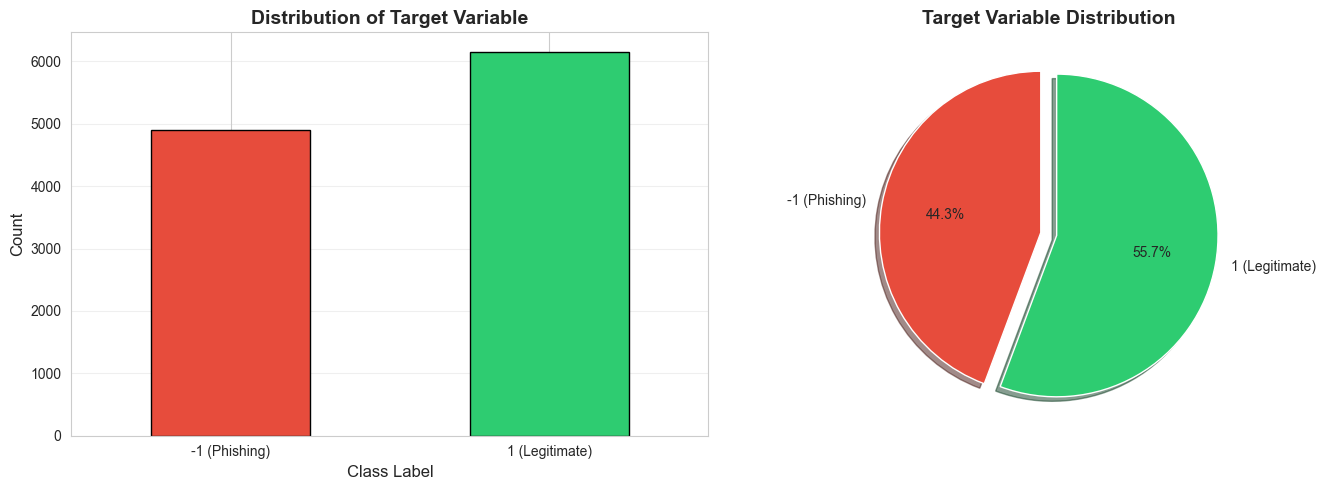

In [7]:
# Analyze target variable distribution
print("=" * 80)
print("TARGET VARIABLE ANALYSIS")
print("=" * 80)
print("\nTarget Variable: 'Result'")
print("-" * 80)
result_counts = df['Result'].value_counts().sort_index()
print("\nValue Counts:")
print(result_counts)
print("\nPercentage Distribution:")
print(df['Result'].value_counts(normalize=True).sort_index() * 100)

# Calculate class balance
print("\n" + "-" * 80)
print("Class Balance Analysis:")
print(f"Class 1 (Legitimate):  {result_counts[1]:5d} samples ({result_counts[1]/len(df)*100:.2f}%)")
print(f"Class -1 (Phishing):   {result_counts[-1]:5d} samples ({result_counts[-1]/len(df)*100:.2f}%)")
print(f"Imbalance Ratio:       {result_counts[1]/result_counts[-1]:.2f}:1")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
result_counts.plot(kind='bar', ax=axes[0], color=['#e74c3c', '#2ecc71'], edgecolor='black')
axes[0].set_title('Distribution of Target Variable', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class Label', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(['-1 (Phishing)', '1 (Legitimate)'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Pie chart
axes[1].pie(result_counts, labels=['-1 (Phishing)', '1 (Legitimate)'], 
            autopct='%1.1f%%', colors=['#e74c3c', '#2ecc71'], startangle=90,
            explode=(0.05, 0.05), shadow=True)
axes[1].set_title('Target Variable Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


## Statistical Summary

In [8]:
# Descriptive statistics
print("=" * 80)
print("STATISTICAL SUMMARY")
print("=" * 80)
print("\nDescriptive Statistics:")
print(df.describe().T)

print("\n" + "-" * 80)
print("\nAdditional Statistics:")
additional_stats = pd.DataFrame({
    'Column': df.columns,
    'Mean': df.mean(),
    'Median': df.median(),
    'Mode': df.mode().iloc[0],
    'Std': df.std(),
    'Variance': df.var(),
    'Skewness': df.skew(),
    'Kurtosis': df.kurtosis()
})
print(additional_stats.to_string(index=False))


STATISTICAL SUMMARY

Descriptive Statistics:
                               count      mean       std  min  25%  50%  75%  \
having_IP_Address            11055.0  0.313795  0.949534 -1.0 -1.0  1.0  1.0   
URL_Length                   11055.0 -0.633198  0.766095 -1.0 -1.0 -1.0 -1.0   
Shortining_Service           11055.0  0.738761  0.673998 -1.0  1.0  1.0  1.0   
having_At_Symbol             11055.0  0.700588  0.713598 -1.0  1.0  1.0  1.0   
double_slash_redirecting     11055.0  0.741474  0.671011 -1.0  1.0  1.0  1.0   
Prefix_Suffix                11055.0 -0.734962  0.678139 -1.0 -1.0 -1.0 -1.0   
having_Sub_Domain            11055.0  0.063953  0.817518 -1.0 -1.0  0.0  1.0   
SSLfinal_State               11055.0  0.250927  0.911892 -1.0 -1.0  1.0  1.0   
Domain_registeration_length  11055.0 -0.336771  0.941629 -1.0 -1.0 -1.0  1.0   
Favicon                      11055.0  0.628584  0.777777 -1.0  1.0  1.0  1.0   
port                         11055.0  0.728268  0.685324 -1.0  1.0  1.0  1.

## Correlation Analysis

CORRELATION ANALYSIS

Highly Correlated Feature Pairs (|correlation| > 0.7):
--------------------------------------------------------------------------------
               Feature_1                Feature_2  Correlation
                 Favicon              popUpWidnow     0.939633
      Shortining_Service double_slash_redirecting     0.842796
                 Favicon                     port     0.803834
                    port      Submitting_to_email     0.799088
double_slash_redirecting              HTTPS_token     0.760799
      Shortining_Service              HTTPS_token     0.757838
                    port              popUpWidnow     0.748517
      Shortining_Service             Abnormal_URL     0.739290
            on_mouseover              popUpWidnow     0.733629
double_slash_redirecting             Abnormal_URL     0.723724
             HTTPS_token             Abnormal_URL     0.716287
          SSLfinal_State                   Result     0.714741
                 Favico

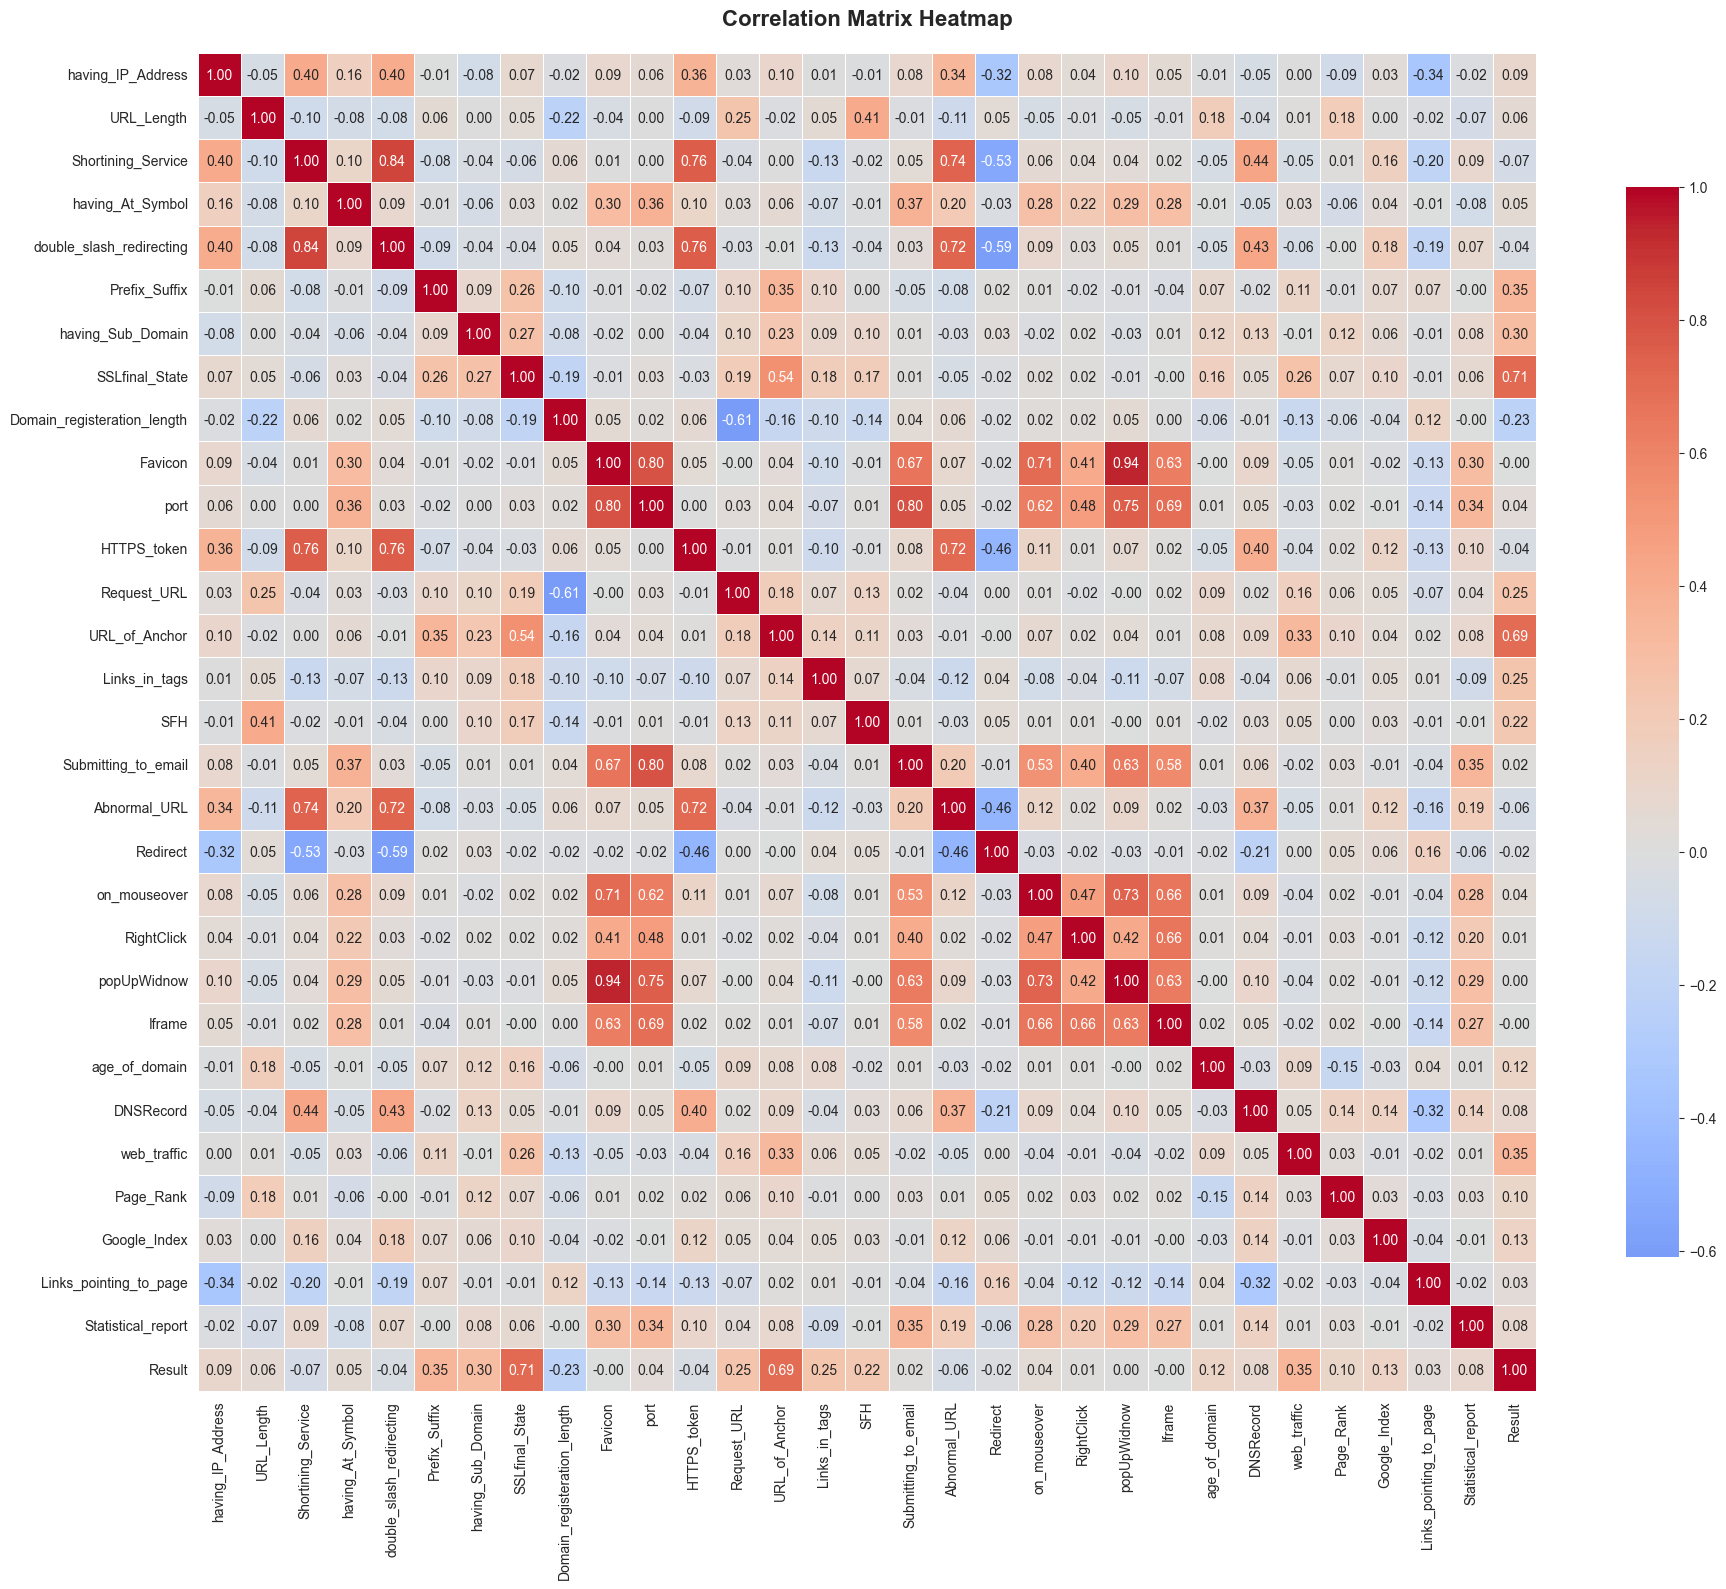

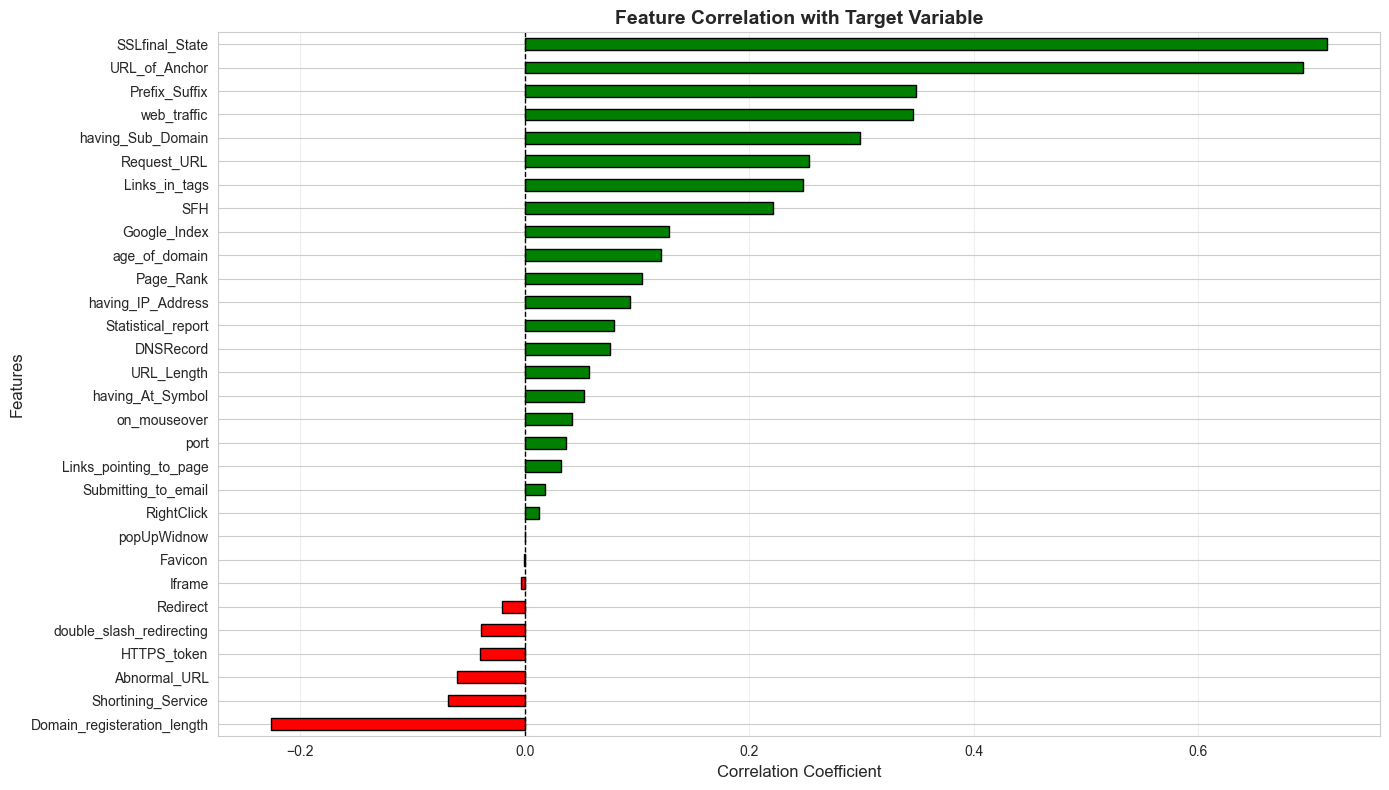

In [10]:
# Correlation matrix
print("=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)

# Calculate correlation matrix
correlation_matrix = df.corr()

# Find highly correlated features
print("\nHighly Correlated Feature Pairs (|correlation| > 0.7):")
print("-" * 80)
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append({
                'Feature_1': correlation_matrix.columns[i],
                'Feature_2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', ascending=False)
    print(high_corr_df.to_string(index=False))
else:
    print("No highly correlated feature pairs found!")

# Correlation with target variable
print("\n" + "-" * 80)
print("\nTop 15 Features Most Correlated with Target Variable:")
target_corr = correlation_matrix['Result'].drop('Result').sort_values(ascending=False)
print(target_corr.head(15))
print("\nBottom 15 Features (Negative Correlation with Target):")
print(target_corr.tail(15))

# Visualize correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Correlation with target - bar plot
plt.figure(figsize=(14, 8))
target_corr_sorted = correlation_matrix['Result'].drop('Result').sort_values(ascending=True)
colors = ['red' if x < 0 else 'green' for x in target_corr_sorted]
target_corr_sorted.plot(kind='barh', color=colors, edgecolor='black')
plt.title('Feature Correlation with Target Variable', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


## Feature Distribution Visualization

FEATURE DISTRIBUTION VISUALIZATION


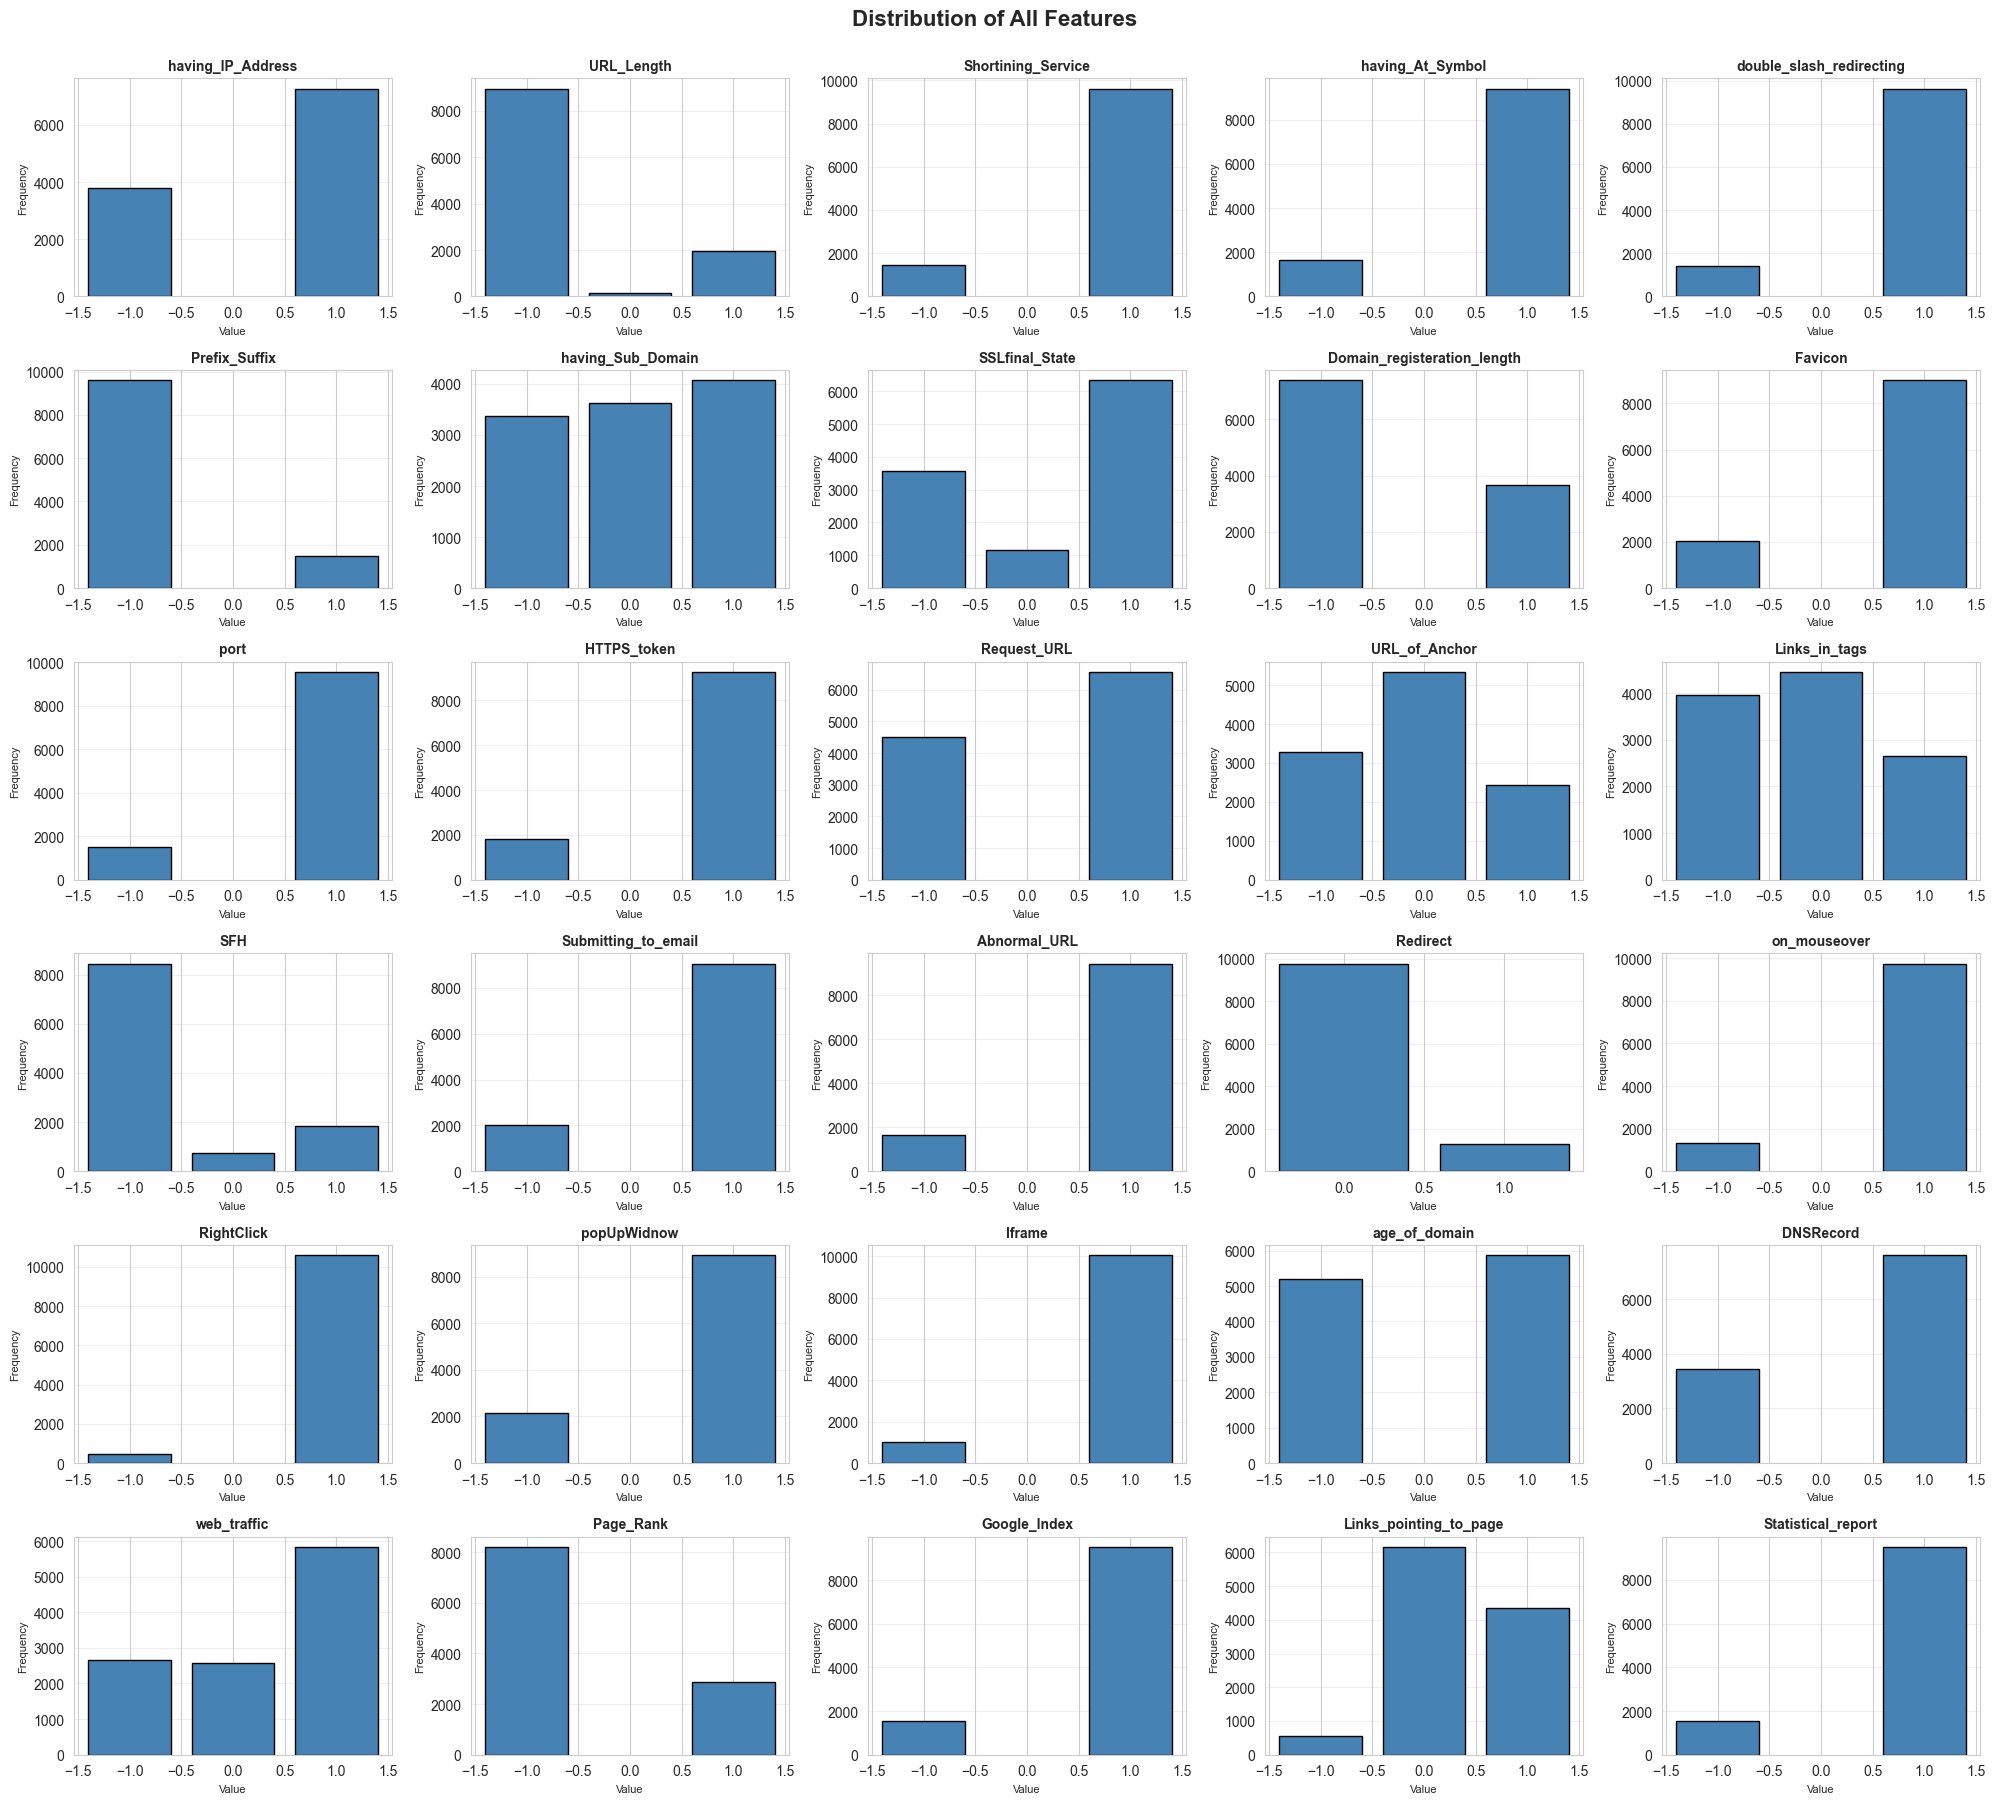

In [11]:
# Plot distribution of all features
print("=" * 80)
print("FEATURE DISTRIBUTION VISUALIZATION")
print("=" * 80)

# Select features excluding target
features = df.columns.drop('Result')

# Create subplots
n_features = len(features)
n_cols = 5
n_rows = int(np.ceil(n_features / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 3))
axes = axes.flatten()

for idx, col in enumerate(features):
    value_counts = df[col].value_counts().sort_index()
    axes[idx].bar(value_counts.index, value_counts.values, color='steelblue', edgecolor='black')
    axes[idx].set_title(col, fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Value', fontsize=8)
    axes[idx].set_ylabel('Frequency', fontsize=8)
    axes[idx].grid(axis='y', alpha=0.3)

# Hide extra subplots
for idx in range(n_features, len(axes)):
    axes[idx].axis('off')

plt.suptitle('Distribution of All Features', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()


## Box Plot Analysis for Outlier Detection

OUTLIER DETECTION USING BOX PLOTS


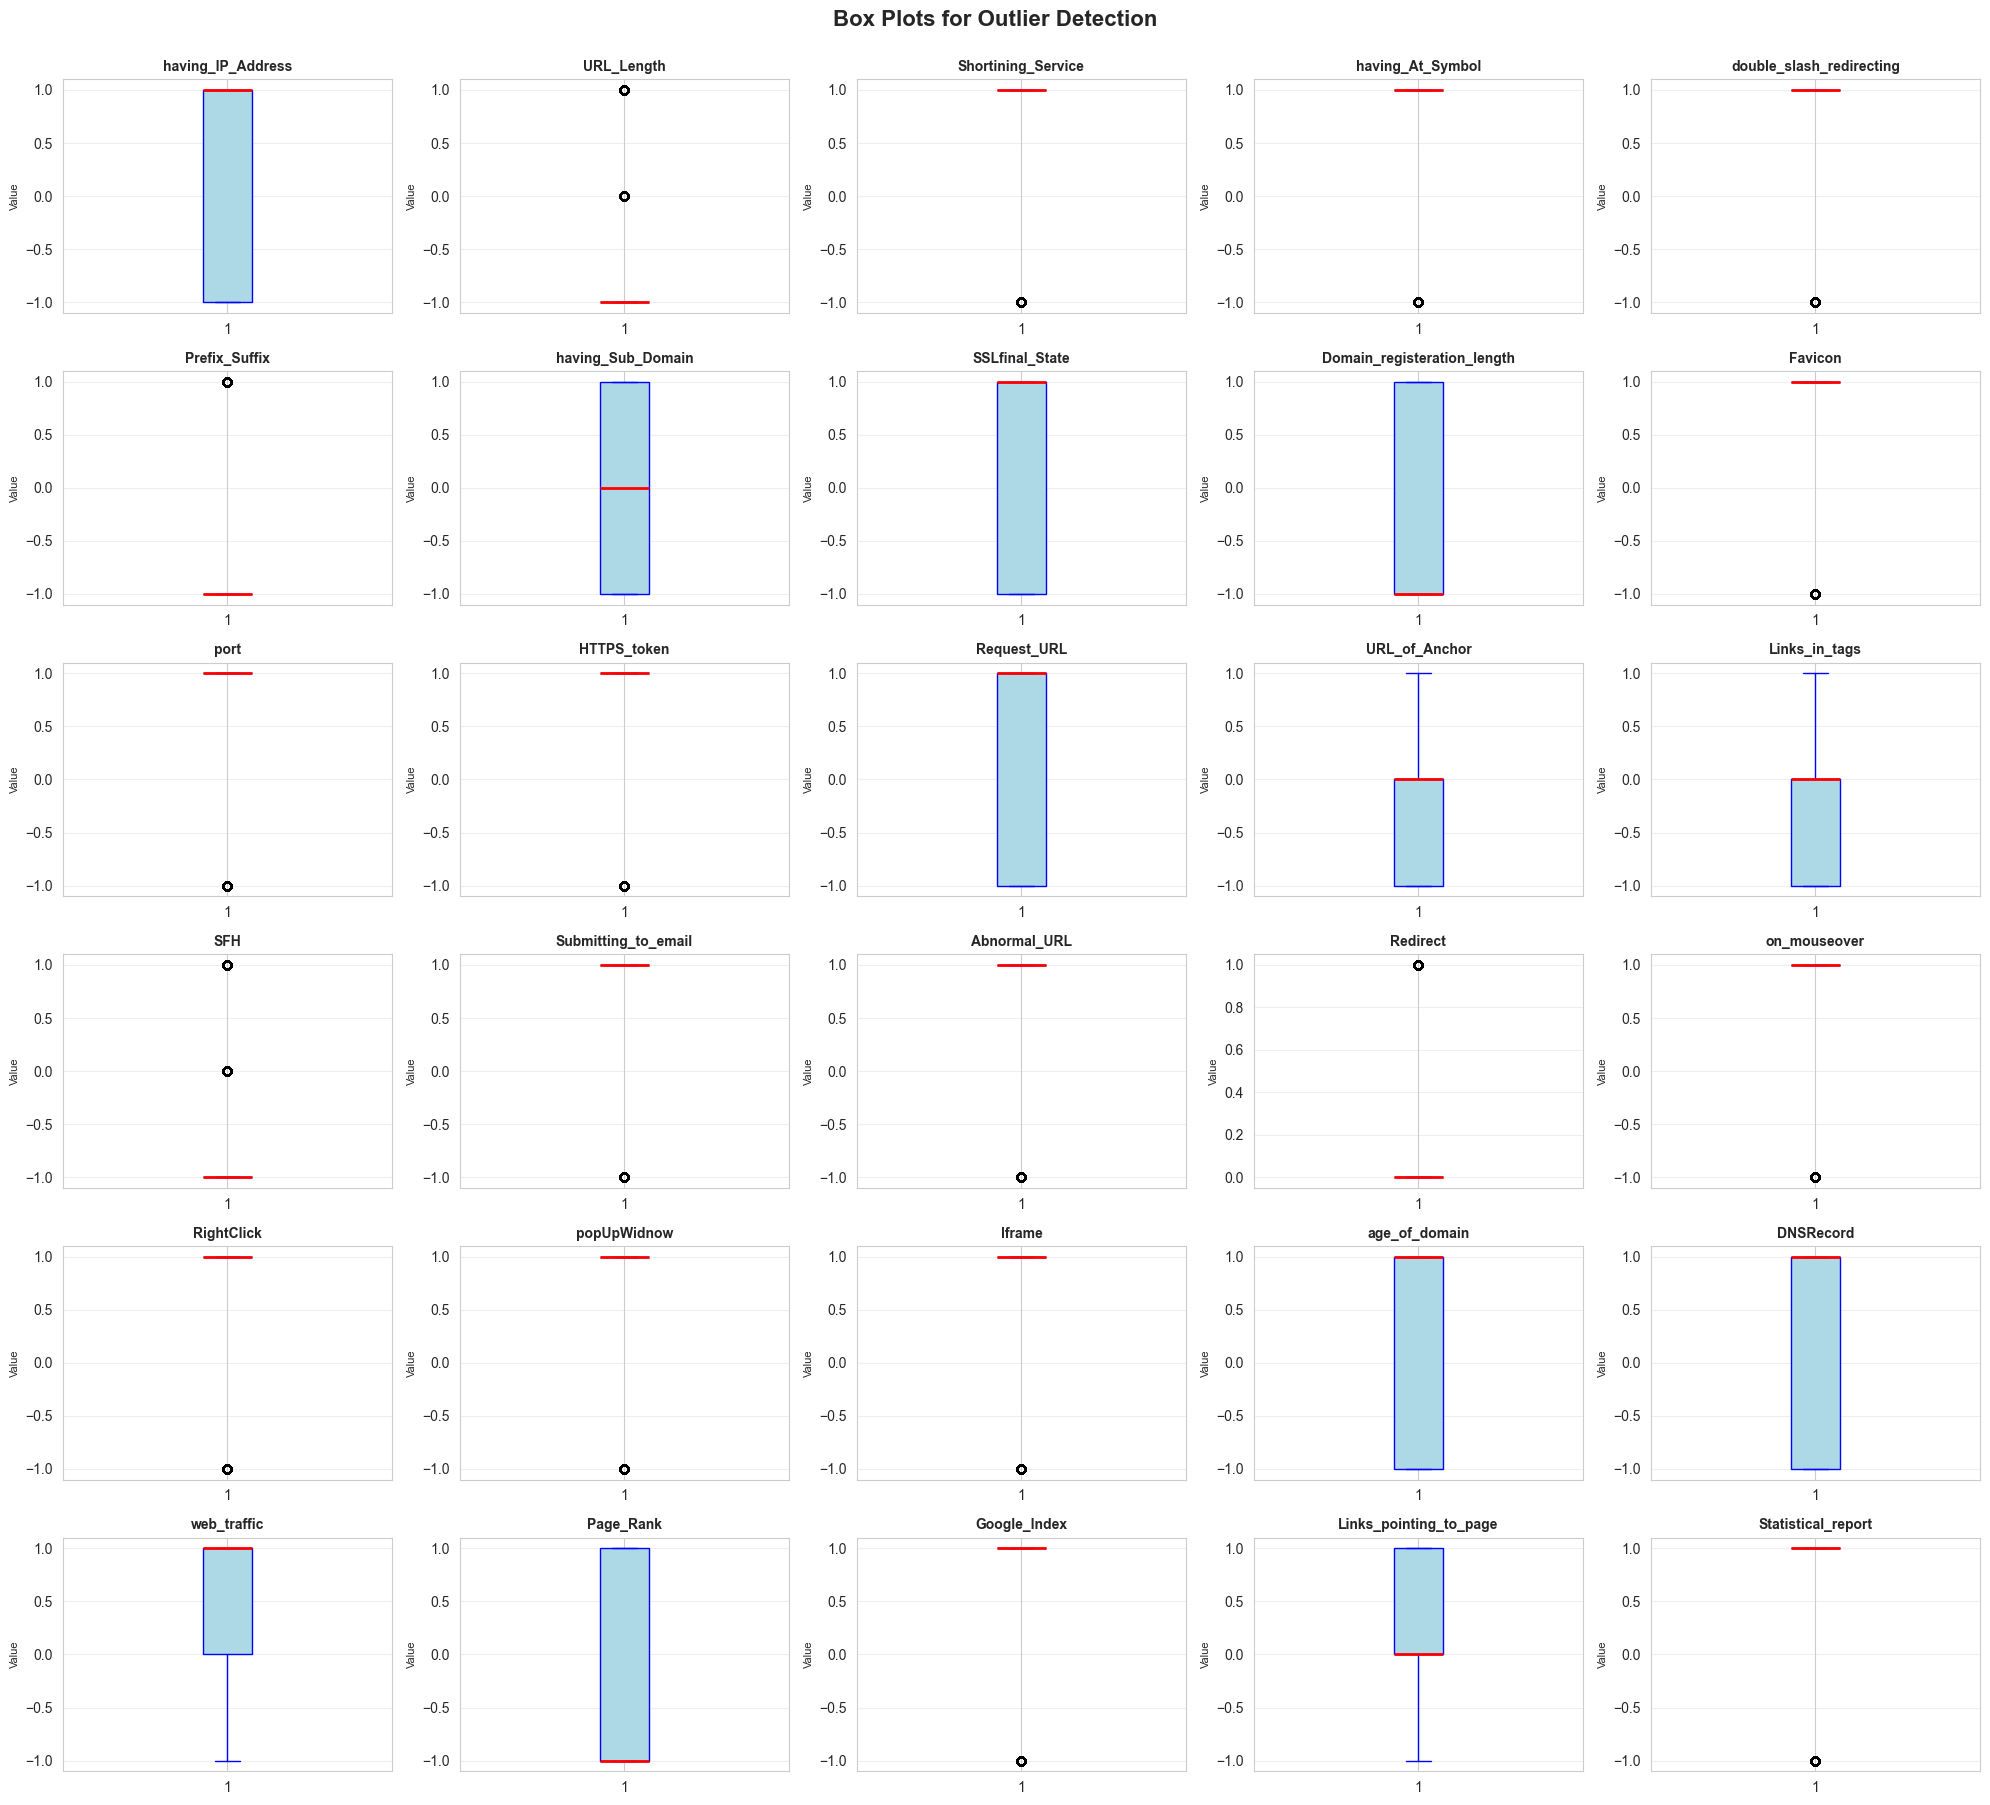


Outlier Detection Summary (Using IQR Method):
--------------------------------------------------------------------------------
URL_Length: 2095 outliers (18.95%)
Shortining_Service: 1444 outliers (13.06%)
having_At_Symbol: 1655 outliers (14.97%)
double_slash_redirecting: 1429 outliers (12.93%)
Prefix_Suffix: 1465 outliers (13.25%)
Favicon: 2053 outliers (18.57%)
port: 1502 outliers (13.59%)
HTTPS_token: 1796 outliers (16.25%)
SFH: 2615 outliers (23.65%)
Submitting_to_email: 2014 outliers (18.22%)
Abnormal_URL: 1629 outliers (14.74%)
Redirect: 1279 outliers (11.57%)
on_mouseover: 1315 outliers (11.90%)
RightClick: 476 outliers (4.31%)
popUpWidnow: 2137 outliers (19.33%)
Iframe: 1012 outliers (9.15%)
Google_Index: 1539 outliers (13.92%)
Statistical_report: 1550 outliers (14.02%)


In [12]:
# Box plots for outlier detection
print("=" * 80)
print("OUTLIER DETECTION USING BOX PLOTS")
print("=" * 80)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 3))
axes = axes.flatten()

for idx, col in enumerate(features):
    axes[idx].boxplot(df[col], vert=True, patch_artist=True,
                      boxprops=dict(facecolor='lightblue', color='blue'),
                      medianprops=dict(color='red', linewidth=2),
                      whiskerprops=dict(color='blue'),
                      capprops=dict(color='blue'))
    axes[idx].set_title(col, fontsize=10, fontweight='bold')
    axes[idx].set_ylabel('Value', fontsize=8)
    axes[idx].grid(axis='y', alpha=0.3)

# Hide extra subplots
for idx in range(n_features, len(axes)):
    axes[idx].axis('off')

plt.suptitle('Box Plots for Outlier Detection', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# Statistical outlier detection
print("\nOutlier Detection Summary (Using IQR Method):")
print("-" * 80)
for col in features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    if len(outliers) > 0:
        print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")


## Class-wise Feature Analysis


CLASS-WISE FEATURE ANALYSIS

Legitimate Websites: 6157 samples
Phishing Websites: 4898 samples

--------------------------------------------------------------------------------

Top 15 Features with Largest Difference Between Classes:
                    Feature  Legitimate_Mean  Phishing_Mean  Difference  Abs_Difference
             SSLfinal_State         0.832223      -0.479788    1.312011        1.312011
              URL_of_Anchor         0.365438      -0.632095    0.997532        0.997532
                web_traffic         0.542797      -0.033891    0.576688        0.576688
                Request_URL         0.408803      -0.092283    0.501086        0.501086
          having_Sub_Domain         0.281468      -0.209473    0.490942        0.490942
              Prefix_Suffix        -0.524119      -1.000000    0.475881        0.475881
Domain_registeration_length        -0.526393      -0.098408   -0.427985        0.427985
              Links_in_tags         0.050999      -0.330747  

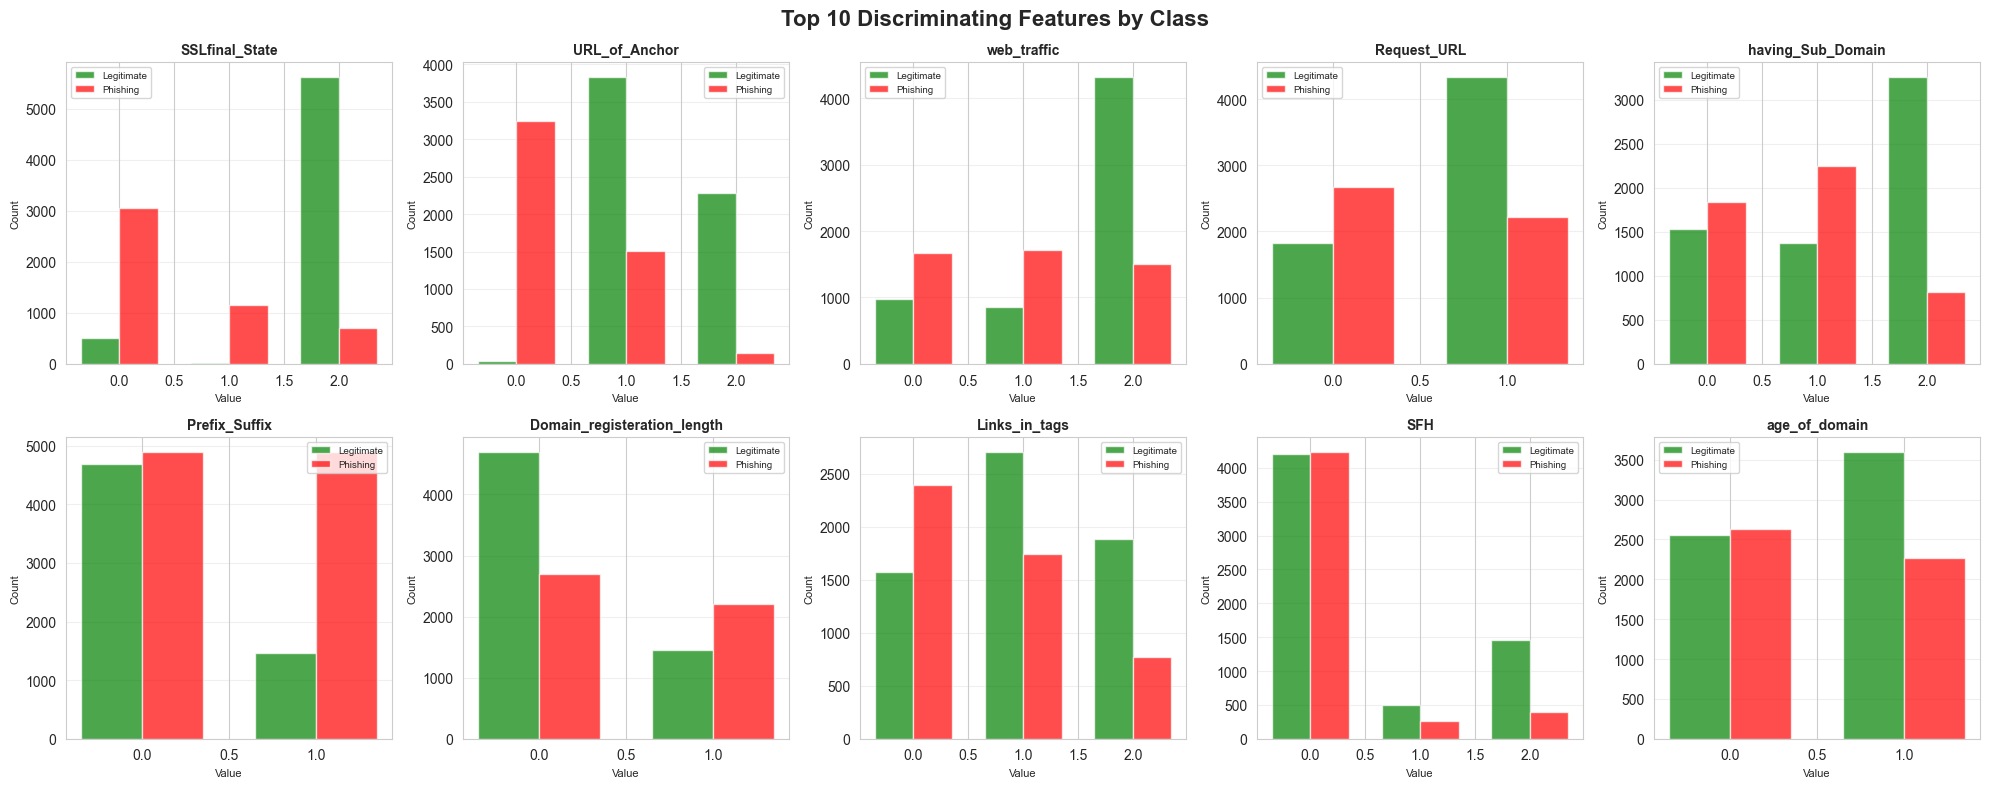

In [13]:
# Compare feature distributions by class
print("=" * 80)
print("CLASS-WISE FEATURE ANALYSIS")
print("=" * 80)

# Separate data by class
legitimate = df[df['Result'] == 1]
phishing = df[df['Result'] == -1]

print(f"\nLegitimate Websites: {len(legitimate)} samples")
print(f"Phishing Websites: {len(phishing)} samples")

# Compare mean values
comparison_df = pd.DataFrame({
    'Feature': features,
    'Legitimate_Mean': [legitimate[col].mean() for col in features],
    'Phishing_Mean': [phishing[col].mean() for col in features],
    'Difference': [legitimate[col].mean() - phishing[col].mean() for col in features]
})
comparison_df['Abs_Difference'] = comparison_df['Difference'].abs()
comparison_df = comparison_df.sort_values('Abs_Difference', ascending=False)

print("\n" + "-" * 80)
print("\nTop 15 Features with Largest Difference Between Classes:")
print(comparison_df.head(15).to_string(index=False))

# Visualize class comparison
top_features = comparison_df.head(10)['Feature'].values
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for idx, feature in enumerate(top_features):
    leg_dist = legitimate[feature].value_counts().sort_index()
    phi_dist = phishing[feature].value_counts().sort_index()
    
    x = np.arange(len(leg_dist))
    width = 0.35
    
    axes[idx].bar(x - width/2, leg_dist.values, width, label='Legitimate', color='green', alpha=0.7)
    axes[idx].bar(x + width/2, phi_dist.values, width, label='Phishing', color='red', alpha=0.7)
    axes[idx].set_title(feature, fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Value', fontsize=8)
    axes[idx].set_ylabel('Count', fontsize=8)
    axes[idx].legend(fontsize=7)
    axes[idx].grid(axis='y', alpha=0.3)

plt.suptitle('Top 10 Discriminating Features by Class', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


## Variance and Information Content Analysis

VARIANCE AND INFORMATION CONTENT ANALYSIS

Features Sorted by Variance:
                    Feature  Variance  Std_Dev  Coefficient_of_Variation
              age_of_domain  0.996340 0.998168                 16.299483
                Request_URL  0.965196 0.982444                  5.259523
          having_IP_Address  0.901614 0.949534                  3.025972
Domain_registeration_length  0.886666 0.941629                  2.796055
                  DNSRecord  0.857862 0.926209                  2.456041
             SSLfinal_State  0.831548 0.911892                  3.634092
                  Page_Rank  0.766130 0.875289                  1.809672
                web_traffic  0.685142 0.827733                  2.881169
          having_Sub_Domain  0.668336 0.817518                 12.783116
                popUpWidnow  0.623812 0.789818                  1.287632
                    Favicon  0.604936 0.777777                  1.237346
        Submitting_to_email  0.596016 0.772021      

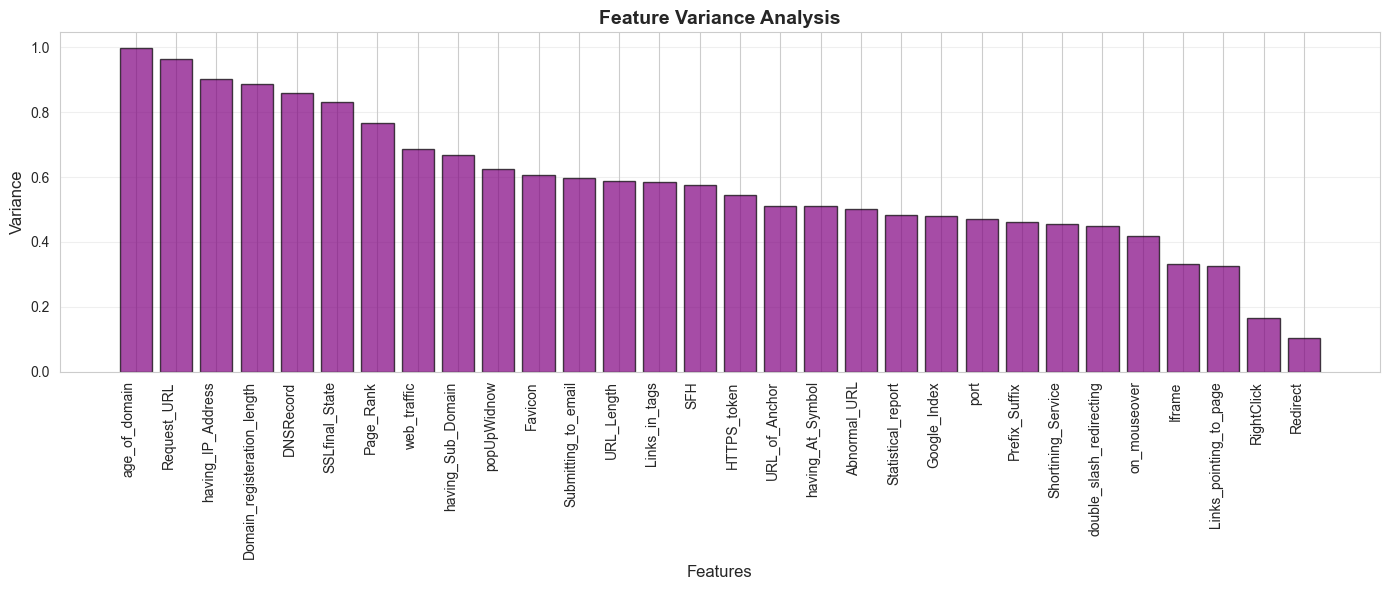


--------------------------------------------------------------------------------

Low Variance Features (Variance < 0.1):
No low variance features found!


In [15]:
# Analyze variance of features
print("=" * 80)
print("VARIANCE AND INFORMATION CONTENT ANALYSIS")
print("=" * 80)

variance_df = pd.DataFrame({
    'Feature': features,
    'Variance': [df[col].var() for col in features],
    'Std_Dev': [df[col].std() for col in features],
    'Coefficient_of_Variation': [df[col].std() / abs(df[col].mean()) if df[col].mean() != 0 else 0 for col in features]
})
variance_df = variance_df.sort_values('Variance', ascending=False)

print("\nFeatures Sorted by Variance:")
print(variance_df.to_string(index=False))

# Visualize variance
plt.figure(figsize=(14, 6))
plt.bar(range(len(variance_df)), variance_df['Variance'], color='purple', alpha=0.7, edgecolor='black')
plt.xticks(range(len(variance_df)), variance_df['Feature'], rotation=90, ha='right')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Variance', fontsize=12)
plt.title('Feature Variance Analysis', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Low variance features
print("\n" + "-" * 80)
print("\nLow Variance Features (Variance < 0.1):")
low_var_features = variance_df[variance_df['Variance'] < 0.1]
if len(low_var_features) > 0:
    print(low_var_features.to_string(index=False))
else:
    print("No low variance features found!")


## Summary

In [16]:
# Comprehensive summary
print("=" * 80)
print("COMPREHENSIVE EDA SUMMARY REPORT")
print("=" * 80)

summary_report = f"""
DATASET CHARACTERISTICS:
{"-" * 80}
• Total Samples:              {len(df):,}
• Total Features:             {len(df.columns)}
• Feature Columns:            {len(df.columns) - 1}
• Target Variable:            Result
• Data Types:                 All Integer (int64)
• Missing Values:             {df.isnull().sum().sum()}
• Duplicate Rows:             {df.duplicated().sum()}
• Memory Usage:               {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB

TARGET VARIABLE:
{"-" * 80}
• Class 1 (Legitimate):       {len(df[df['Result']==1]):,} samples ({len(df[df['Result']==1])/len(df)*100:.2f}%)
• Class -1 (Phishing):        {len(df[df['Result']==-1]):,} samples ({len(df[df['Result']==-1])/len(df)*100:.2f}%)
• Class Balance Ratio:        {len(df[df['Result']==1])/len(df[df['Result']==-1]):.2f}:1
• Data Balance:               {"Relatively Balanced" if abs(len(df[df['Result']==1])/len(df[df['Result']==-1]) - 1) < 0.5 else "Imbalanced"}

FEATURE CHARACTERISTICS:
{"-" * 80}
• Value Range:                Most features have values in [-1, 0, 1]
• Feature Encoding:           Categorical/Ordinal encoding applied
• High Correlation Pairs:     {len(high_corr_pairs) if 'high_corr_pairs' in locals() else 'N/A'}
• Low Variance Features:      {len(low_var_features) if 'low_var_features' in locals() else 'N/A'}

DATA QUALITY:
{"-" * 80}
• Completeness:               100% (No missing values)
• Uniqueness:                 {"100%" if df.duplicated().sum() == 0 else f"{(1 - df.duplicated().sum()/len(df))*100:.2f}%"}
• Consistency:                All features have consistent integer encoding
• Overall Quality:            ✓ High Quality Dataset

RECOMMENDATIONS:
{"-" * 80}
1. No missing value imputation required
2. Consider checking duplicate rows if any
3. Feature scaling may not be critical (similar value ranges)
4. Monitor highly correlated features for multicollinearity
5. Dataset is suitable for machine learning classification tasks
6. Consider feature selection based on correlation analysis
7. Class balance is acceptable - stratified sampling recommended
"""

print(summary_report)

# Save summary to file
with open('eda_summary_report.txt', 'w') as f:
    f.write(summary_report)
print("\n✓ Summary report saved to 'eda_summary_report.txt'")


COMPREHENSIVE EDA SUMMARY REPORT

DATASET CHARACTERISTICS:
--------------------------------------------------------------------------------
• Total Samples:              11,055
• Total Features:             31
• Feature Columns:            30
• Target Variable:            Result
• Data Types:                 All Integer (int64)
• Missing Values:             0
• Duplicate Rows:             5206
• Memory Usage:               2.61 MB

TARGET VARIABLE:
--------------------------------------------------------------------------------
• Class 1 (Legitimate):       6,157 samples (55.69%)
• Class -1 (Phishing):        4,898 samples (44.31%)
• Class Balance Ratio:        1.26:1
• Data Balance:               Relatively Balanced

FEATURE CHARACTERISTICS:
--------------------------------------------------------------------------------
• Value Range:                Most features have values in [-1, 0, 1]
• Feature Encoding:           Categorical/Ordinal encoding applied
• High Correlation Pairs:    